In [ ]:
import pandas as pd

# Load the synthetic dataset
df = pd.read_csv("oil_spill_synthetic_data.csv")

In [ ]:
# Risk Score = (Spill Volume × Environmental Impact) / Response Time
df['Risk_Score'] = (df['Spill_Volume_Barrels'] * df['Environmental_Impact_Score']) / df['Response_Time_Hours']


In [ ]:
# Define Risk Levels based on Risk Score ranges
df['Risk_Level'] = pd.cut(df['Risk_Score'],
                          bins=[-1, 50, 200, 500, float('inf')],
                          labels=['Low', 'Moderate', 'High', 'Critical'])


In [ ]:
# Generate a summary by Risk Level
risk_summary = df.groupby('Risk_Level').agg({
    'Incident_ID': 'count',
    'Spill_Volume_Barrels': 'mean',
    'Response_Time_Hours': 'mean',
    'Environmental_Impact_Score': 'mean',
    'Financial_Loss_USD_M': 'mean'
}).rename(columns={'Incident_ID': 'Incident_Count'}).reset_index()

# Display summary
print("\n--- Risk Summary Table ---")
print(risk_summary)



--- Risk Summary Table ---
  Risk_Level  Incident_Count  Spill_Volume_Barrels  Response_Time_Hours  \
0        Low             139             49.760216             5.738129   
1   Moderate             258            105.921163             5.256589   
2       High              80            148.223375             3.741250   
3   Critical              23            215.297826             2.156522   

   Environmental_Impact_Score  Financial_Loss_USD_M  
0                    3.430935              1.934317  
1                    5.851550              2.063372  
2                    7.395000              1.825500  
3                    7.578261              1.524348  


/tmp/ipython-input-1896505319.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_summary = df.groupby('Risk_Level').agg({


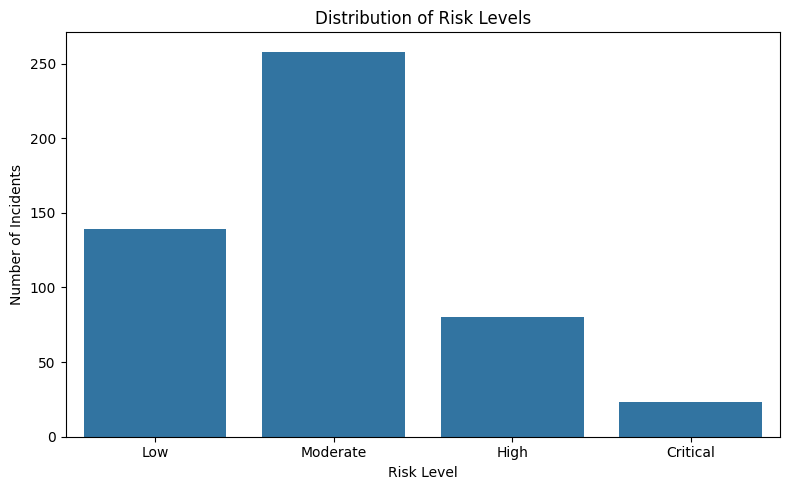

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='Risk_Level', data=df, order=['Low', 'Moderate', 'High', 'Critical'])
plt.title('Distribution of Risk Levels')
plt.xlabel('Risk Level')
plt.ylabel('Number of Incidents')
plt.tight_layout()
plt.show()


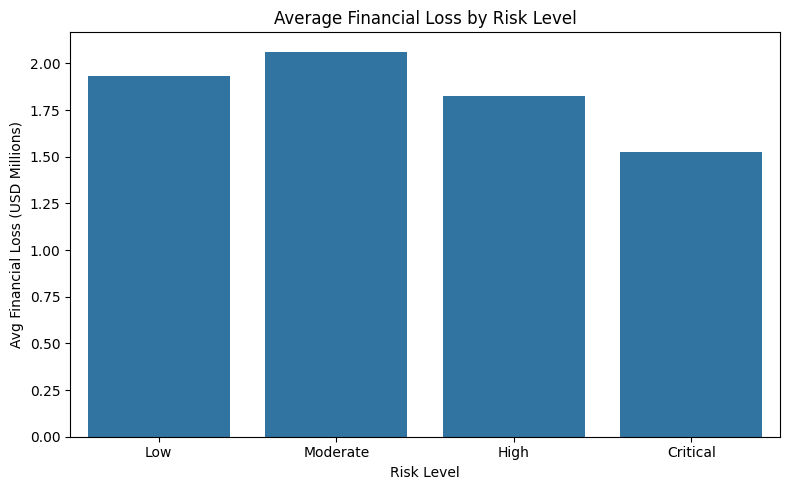

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Risk_Level', y='Financial_Loss_USD_M', data=risk_summary)
plt.title('Average Financial Loss by Risk Level')
plt.ylabel('Avg Financial Loss (USD Millions)')
plt.xlabel('Risk Level')
plt.tight_layout()
plt.show()


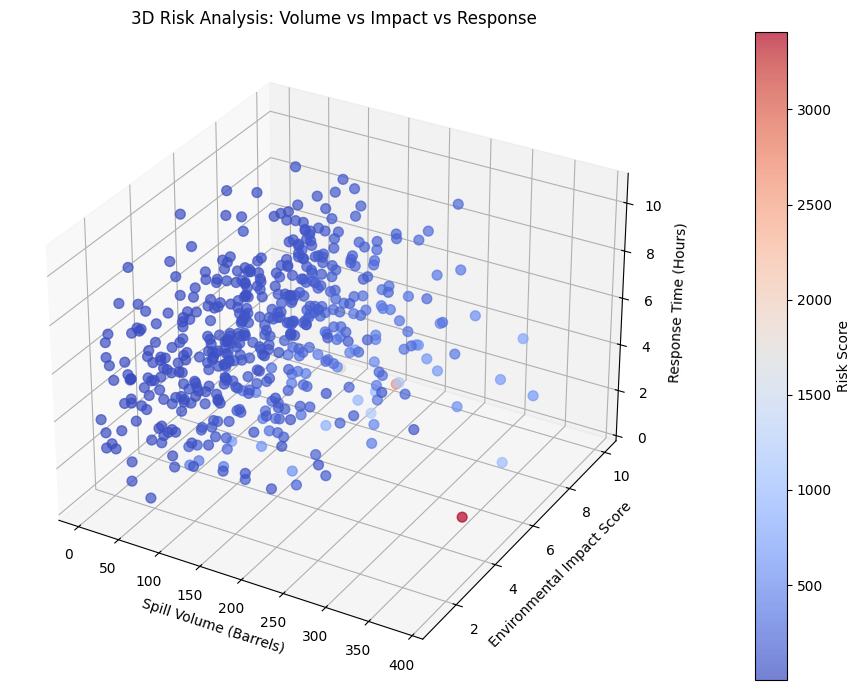

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
df = pd.read_csv("oil_spill_synthetic_data.csv")

# Calculate Risk Score
df['Risk_Score'] = (df['Spill_Volume_Barrels'] * df['Environmental_Impact_Score']) / df['Response_Time_Hours']

# Create 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter points
sc = ax.scatter(
    df['Spill_Volume_Barrels'],
    df['Environmental_Impact_Score'],
    df['Response_Time_Hours'],
    c=df['Risk_Score'],          # Color mapped to risk score
    cmap='coolwarm',
    s=50,
    alpha=0.7
)

# Set axis labels
ax.set_xlabel('Spill Volume (Barrels)')
ax.set_ylabel('Environmental Impact Score')
ax.set_zlabel('Response Time (Hours)')
ax.set_title('3D Risk Analysis: Volume vs Impact vs Response')

# Add color bar to indicate risk score
cbar = plt.colorbar(sc, pad=0.1)
cbar.set_label('Risk Score')

plt.tight_layout()
plt.show()


In [ ]:
# Calculate Risk Score
df['Risk_Score'] = (df['Spill_Volume_Barrels'] * df['Environmental_Impact_Score']) / df['Response_Time_Hours']

# Define Risk Levels based on Risk Score ranges
df['Risk_Level'] = pd.cut(df['Risk_Score'],
                          bins=[-1, 50, 200, 500, float('inf')],
                          labels=['Low', 'Moderate', 'High', 'Critical'])

In [ ]:
# Save the updated DataFrame to a new CSV file
df.to_csv('oil_spill_with_risk_data.csv', index=False)